# 5. How to Log and Visualize Simulations

Here we explain how to take a log of simulation results and how to visualize it. 

In [1]:
%matplotlib inline
import math
from ecell4 import *

## 5.1. Logging Simulations with Observers

E-Cell4 provides special classes for logging, named `Observer`. `Observer` class is given when you call the `run` function of `Simulator`.

In [2]:
def create_simulator(f=gillespie.GillespieFactory()):
    m = NetworkModel()
    A, B, C = Species('A', '0.005', '1'), Species('B', '0.005', '1'), Species('C', '0.005', '1')
    m.add_reaction_rule(create_binding_reaction_rule(A, B, C, 0.01))
    m.add_reaction_rule(create_unbinding_reaction_rule(C, A, B, 0.3))
    w = f.create_world()
    w.bind_to(m)
    w.add_molecules(C, 60)
    sim = f.create_simulator(w)
    sim.initialize()
    return sim

One of most popular `Observer` is `FixedIntervalNumberObserver`, which logs the number of molecules with the given time interval. `FixedIntervalNumberObserver` requires an interval and a list of serials of `Species` for logging.

In [3]:
obs1 = FixedIntervalNumberObserver(0.1, ['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)

`data` function of `FixedIntervalNumberObserver` returns the data logged.

In [4]:
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.1, 0.0, 0.0, 60.0], [0.2, 0.0, 0.0, 60.0], [0.30000000000000004, 5.0, 5.0, 55.0], [0.4, 8.0, 8.0, 52.0], [0.5, 8.0, 8.0, 52.0], [0.6000000000000001, 8.0, 8.0, 52.0], [0.7000000000000001, 11.0, 11.0, 49.0], [0.8, 14.0, 14.0, 46.0], [0.9, 14.0, 14.0, 46.0], [1.0, 15.0, 15.0, 45.0]]


`targets()` returns a list of `Species`, which you specified as an argument of the constructor.

In [5]:
print([sp.serial() for sp in obs1.targets()])

['A', 'B', 'C']


`NumberObserver` logs the number of molecules after every steps when a reaction occurs. This observer is useful to log all reactions, but not available for `ode`.

In [6]:
obs1 = NumberObserver(['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.143979748309557, 1.0, 1.0, 59.0], [0.263959301731782, 2.0, 2.0, 58.0], [0.28549985484415447, 3.0, 3.0, 57.0], [0.2920290844608921, 4.0, 4.0, 56.0], [0.3151450201904092, 5.0, 5.0, 55.0], [0.32962099109027987, 6.0, 6.0, 54.0], [0.33943151256600035, 7.0, 7.0, 53.0], [0.38459684239249475, 8.0, 8.0, 52.0], [0.4402392101074317, 9.0, 9.0, 51.0], [0.4488367232148584, 10.0, 10.0, 50.0], [0.4724492407095052, 11.0, 11.0, 49.0], [0.48969169545303415, 12.0, 12.0, 48.0], [0.5926648902430811, 13.0, 13.0, 47.0], [0.7112014766673606, 14.0, 14.0, 46.0], [0.7268968273742534, 15.0, 15.0, 45.0], [0.7889733307696482, 16.0, 16.0, 44.0], [0.7938779425321273, 17.0, 17.0, 43.0], [0.9703902424683863, 18.0, 18.0, 42.0], [0.9712948910756202, 17.0, 17.0, 43.0], [1.0, 17.0, 17.0, 43.0]]


`TimingNumberObserver` allows you to give the times for logging as an argument of its constructor.

In [7]:
obs1 = TimingNumberObserver([0.0, 0.1, 0.2, 0.5, 1.0], ['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.1, 0.0, 0.0, 60.0], [0.2, 0.0, 0.0, 60.0], [0.5, 10.0, 10.0, 50.0], [1.0, 16.0, 16.0, 44.0]]


`run` function accepts multile `Observer`s at once.

In [8]:
obs1 = NumberObserver(['C'])
obs2 = FixedIntervalNumberObserver(0.1, ['A', 'B'])
sim = create_simulator()
sim.run(1.0, [obs1, obs2])
print(obs1.data())
print(obs2.data())

[[0.0, 60.0], [0.22087040257109863, 59.0], [0.22720792132387785, 58.0], [0.24968763863882104, 57.0], [0.2637930785790673, 56.0], [0.27337221983130383, 55.0], [0.35394818219048224, 54.0], [0.36231206722433756, 53.0], [0.38536272493723256, 52.0], [0.6152314487155562, 51.0], [0.6759207676775343, 50.0], [0.6807518102635762, 49.0], [0.7009006683808036, 48.0], [0.7485557651303876, 47.0], [0.7530285146153741, 46.0], [0.9214853607237395, 45.0], [1.0, 45.0]]
[[0.0, 0.0, 0.0], [0.1, 0.0, 0.0], [0.2, 0.0, 0.0], [0.30000000000000004, 5.0, 5.0], [0.4, 8.0, 8.0], [0.5, 8.0, 8.0], [0.6000000000000001, 8.0, 8.0], [0.7000000000000001, 11.0, 11.0], [0.8, 14.0, 14.0], [0.9, 14.0, 14.0], [1.0, 15.0, 15.0]]


`FixedIntervalHDF5Observedr` logs the whole data in a `World` to an output file with the fixed interval. Its second argument is a prefix for output filenames. `filename()` returns the name of a file scheduled to be saved next. At most one format string like `%02d` is allowed to use a step count in the file name. When you do not use the format string, it overwrites the latest data to the file.

In [9]:
obs1 = FixedIntervalHDF5Observer(0.2, 'test%02d.h5')
print(obs1.filename())
sim = create_simulator()
sim.run(1.0, obs1) # Now you have steped 5 (1.0/0.2) times
print(obs1.filename())

test00.h5
test06.h5


In [10]:
w = load_world('test05.h5')
print(w.t(), w.num_molecules(Species('C')))

1.0 44


The usage of `FixedIntervalCSVObserver` is almost same with that of `FixedIntervalHDF5Observer`. It saves positions (x, y, z) of particles with the radius (r) and serial number of `Species` (sid) to a CSV file.

In [11]:
obs1 = FixedIntervalCSVObserver(0.2, "test%02d.csv")
print(obs1.filename())
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.filename())

test00.csv
test06.csv


Here is the first 10 lines in the output CSV file.

In [12]:
print(''.join(open("test05.csv").readlines()[: 10]))

x,y,z,r,sid
0.17508278810419142,0.12197625380940735,0.53627523058094084,0,0
0.24078186159022152,0.62765785818919539,0.7254820850212127,0,0
0.40445487247779965,0.16720660566352308,0.92957371729426086,0,0
0.24083335651084781,0.59580284473486245,0.51183571317233145,0,0
0.90290508698672056,0.4137285016477108,0.39729581261053681,0,0
0.51044316007755697,0.26319809840060771,0.40705726365558803,0,0
0.84177179471589625,0.085374288959428668,0.64473599148914218,0,0
0.54177056765183806,0.098819603677839041,0.17240164172835648,0,0
0.28669063560664654,0.71829434810206294,0.91102162329480052,0,0



For particle simulations, E-Cell4 also provides `Observer` to trace a trajectory of a molecule, named `FixedIntervalTrajectoryObserver`. When no `ParticleID` is specified, it logs all the trajectories. Once some `ParticleID` is lost for the reaction during a simulation, it just stop to trace the particle any more.

In [13]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalTrajectoryObserver(0.01)
sim.run(0.1, obs1)

In [14]:
print([tuple(pos) for pos in obs1.data()[0]])

[(0.46540305112880387, 0.739008344562721, 0.48), (0.2122891110412088, 0.9266471820493494, 0.665), (0.49806291436591293, 0.8689121551303868, 0.685), (0.7838367176906171, 0.8313843876330611, 0.64), (0.9961258287318259, 0.7967433714816836, 0.5), (0.7920016834998943, 0.9122134253196088, 0.63), (0.7348469228349536, 0.7534421012924616, 0.515), (0.9716309313039941, 0.851591647054698, 0.525), (1.1349302474895393, 0.9122134253196088, 0.63), (0.9961258287318259, 0.9439676901250381, 0.725), (0.718516991216399, 0.8833459118601275, 0.93)]


Generally, `World` assumes a periodic boundary for each plane. To avoid the big jump of a particle at the edge due to the boundary condition, `FixedIntervalTrajectoryObserver` tries to keep the shift of positions. Thus, the positions stored in the `Observer` are not necessarily limited in the cuboid given for the `World`. To track the diffusion over the boundary condition accurately, the step interval for logging must be small enough. Of course, you can disable this option. See `help(FixedIntervalTrajectoryObserver)`.

## 5.2. Visualization of Data Logged

In this section, we explain the visualization tools for data logged by `Observer`.

Firstly, for time course data, `viz.plot_number_observer` plots the data provided by `NumberObserver`, `FixedIntervalNumberObserver` and `TimingNumberObserver`. For the detailed usage of `viz.plot_number_observer`, see `help(viz.plot_number_observer)`.

In [15]:
obs1 = NumberObserver(['C'])
obs2 = FixedIntervalNumberObserver(0.1, ['A', 'B'])
sim = create_simulator()
sim.run(10.0, [obs1, obs2])

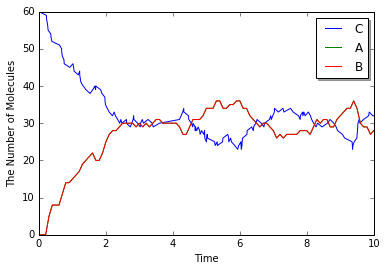

In [16]:
viz.plot_number_observer(obs1, obs2)

You can set the style for plotting, and even add an arbitrary function to plot.

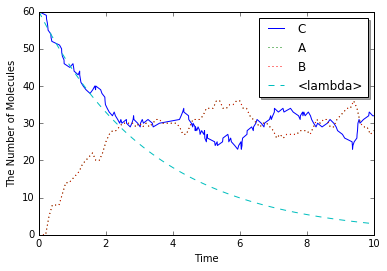

In [17]:
viz.plot_number_observer(obs1, '-', obs2, ':', lambda t: 60 * math.exp(-0.3 * t), '--')

Plotting in the phase plane is also available by specifing the x-axis and y-axis.

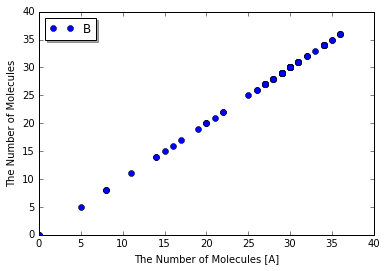

In [18]:
viz.plot_number_observer(obs2, 'o', x='A', y='B')

For spatial simulations, to visualize the state of `World`, `viz.plot_world` is available. This function plots the points of particles in three-dimensional volume in the interactive way. You can save the image by clicking a right button on the drawing region.

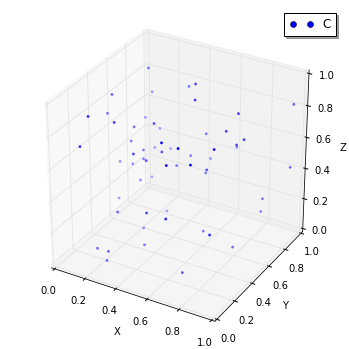

In [19]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
# viz.plot_world(sim.world())
viz.plot_world(sim.world(), interactive=False)

You can also make a movie from a series of HDF5 files, given as a `FixedIntervalHDF5Observer`. NOTE: `viz.plot_movie` requires an extra library, `ffmpeg`, when `interactive=False`.

In [20]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalHDF5Observer(0.02, 'test%02d.h5')
sim.run(1.0, obs1)
viz.plot_movie(obs1)

Finally, corresponding to `FixedIntervalTrajectoryObserver`, `viz.plot_trajectory` provides a visualization of particle trajectories.

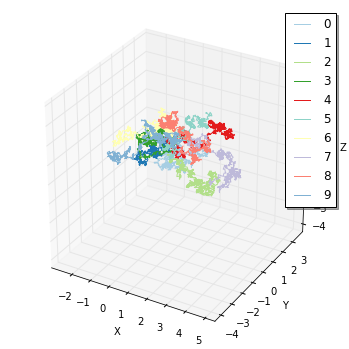

In [21]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalTrajectoryObserver(1e-3)
sim.run(1, obs1)
# viz.plot_trajectory(obs1)
viz.plot_trajectory(obs1, interactive=False)